In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_boston

In [3]:
df = load_boston()

C:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func

In [4]:
dataset=pd.DataFrame(df.data)

In [5]:
dataset.columns = df.feature_names

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
### Independent and dependent features
X = dataset
y=df.target

In [8]:
# TRain test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=10)

In [9]:
## Standardizing the dataset
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
mypipeline = Pipeline([
     ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [19]:
regression = mypipeline.fit_transform(X_train,y_train)

In [20]:
from sklearn.linear_model import LinearRegression
### Cross Validation for hyperparameter tuning in LR
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [21]:
mse = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)


In [22]:
np.mean(mse)

-22.007089929164334

In [23]:
#Prediction
reg_predict = regression.predict(X_test)

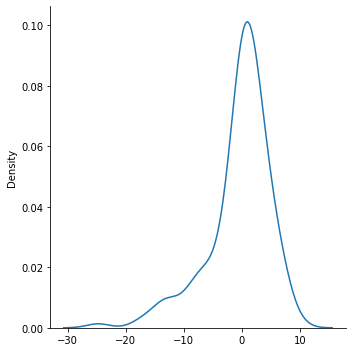

In [24]:
import seaborn as sns
sns.displot(reg_predict-y_test,kind='kde')

In [25]:
from sklearn.metrics import r2_score
score = r2_score(reg_predict,y_test)

In [26]:
score

0.5897898883800874